# Introduction to Pandas and scikit-learn (sklearn)
Tutorial created by Divya with some content adapted from Tirendaz Academy

## Overview of Pandas
Pandas is one of the most important libraries of Python. Pandas has data structures for data analysis. The most used of these are Series and DataFrame data structures. Series is one dimensional, that is, it consists of a column. Data frame is two-dimensional, i.e. it consists of rows and columns.

## Overview of sklearn
sklearn is a powerful Python library for **machine learning**. It has tools to help us build models that can make predictions based on data, such as predicting grades based on study hours or guessing someone’s favorite movie genre.

More information at the Pandas web page: https://pandas.pydata.org/

More information at the scikit-learn web page: https://scikit-learn.org

## Setting up
To get started, install Pandas with `pip install pandas`
And install scikit-learn with `pip install scikit-learn`
And let's import it as follows:

In [26]:
import pandas as pd # pd is just a shorter way to call pandas functions
pd.__version__ # let's check the version

import sklearn

### Why Use Pandas?
1. Organized Data: With pandas, data is structured in a clear format called a DataFrame (think of it as a spreadsheet).
2. Easy Data Analysis: It provides tools to explore and summarize data, like finding averages, sorting, or filtering out specific values.
3. Data Cleaning: You can use pandas to fix, remove, or fill in missing data.
4. Compatibility: Pandas works well with other Python libraries, especially ones for visualization like matplotlib, so you can easily plot and visualize data.

In short, pandas helps turn data into valuable insights, making data analysis easier, faster, and more efficient.

### Why Use sklearn?
1. User-Friendly: It has simple functions to handle complex machine learning tasks, making it beginner-friendly.
2. Variety of Models: sklearn includes many pre-built algorithms, like decision trees, linear regression, and clustering models, so we can experiment with different methods.
3. Data Handling: It provides tools to split data, transform features, and evaluate model accuracy, all in one place.
4. Interoperability: sklearn works well with other Python libraries like pandas and matplotlib, making it easy to visualize and process data.

In short, sklearn makes machine learning accessible, efficient, and enjoyable to explore and use!

# Let's get into Pandas first!

## Creating A DataFrame

What is a DataFrame?: A DataFrame is like a table with rows and columns.

Now let's create a simple DataFrame with some random data as follows:

In [2]:
# say we have this data
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [17, 18, 16],
    'Grade': ['A', 'B', 'A']
}

# now let's turn it into a DataFrame with the following line
school_df = pd.DataFrame(data)
print(school_df)

      Name  Age Grade
0    Alice   17     A
1      Bob   18     B
2  Charlie   16     A


Notice how each column is like a key in a dictionary, and each individual list represents values for that column

## Basic DataFrame Operations

- `df.head()` - Shows the first few rows.
- `df.tail()` - Shows the last few rows.
- `df.info()` - Shows information about the DataFrame.
- `df.shape` - Shows the number of rows and columns.
- `df.dtypes` - Shows the data types of each column.
- `df.describe()` - Shows summary statistics for each column.
- `df.columns` - Shows the column names.

Let's see these in action now:

In [3]:
school_df.head()

# school_df.tail() 

# This would show us the same information as school_df.head() 
# since we only have 3 rows in our DataFrame right now

,Name,Age,Grade
0,Alice,17,A
1,Bob,18,B
2,Charlie,16,A


Note that we can also specify the number of rows to show:

In [4]:
school_df.head(2)

,Name,Age,Grade
0,Alice,17,A
1,Bob,18,B


In [5]:
print("Info: ", school_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Grade   3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes
Info:  None


In [6]:
print("Shape: ", school_df.shape)

print("Data types: ", school_df.dtypes)

print("Summary statistics: \n", school_df.describe()) #\n is a new line

print("Column names: ", school_df.columns)

Shape:  (3, 3)
Data types:  Name     object
Age       int64
Grade    object
dtype: object
Summary statistics: 
         Age
count   3.0
mean   17.0
std     1.0
min    16.0
25%    16.5
50%    17.0
75%    17.5
max    18.0
Column names:  Index(['Name', 'Age', 'Grade'], dtype='object')


### Accessing Columns

- `df.column_name` OR `df["column_name"]` - Accesses a column by name.

In [7]:
print(school_df.Name)

print("\n results in the same out put as \n")

print(school_df["Name"])

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

 results in the same out put as 

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object


### What if I want to access multiple columns?

We can do that too!

In [8]:
school_df[["Age", "Name"]] # notice how the output matches the order of which columns we asked for first

,Age,Name
0,17,Alice
1,18,Bob
2,16,Charlie


## Filtering Data

Let's say we only want to look at students who are older than 16.

In [9]:
print(school_df[school_df['Age'] > 16])  # Show students older than 16

    Name  Age Grade
0  Alice   17     A
1    Bob   18     B


What about students who are older than 16 AND who have an A?

In [10]:
print(school_df[(school_df['Age'] > 16) & (school_df['Grade'] == 'A')])

    Name  Age Grade
0  Alice   17     A


## Selecting Data with loc and iloc

What is the difference between loc and iloc?

- `df.loc[]` - Selects rows and columns by label.
- `df.iloc[]` - Selects rows and columns by integer position.

For example:

In [11]:
# using loc
print("Using loc:")
print(school_df.loc[0, 'Name'])
print(school_df.loc[0:2, 'Name'])

# using iloc
print("\nUsing iloc:")
print(school_df.iloc[0, 0]) # the Name column is the 0th row
print(school_df.iloc[0:2, 0]) 

Using loc:
Alice
0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

Using iloc:
Alice
0    Alice
1      Bob
Name: Name, dtype: object


## Adding and Modifying Columns

Let's add a column and base it's value off of another column.

In [12]:
# let's add a new column called "Passed"
# we want this column to be a boolean
# and we wan to base it off of the "Grade" column

school_df['Passed'] = school_df['Grade'] == 'A'
print(school_df)

      Name  Age Grade  Passed
0    Alice   17     A    True
1      Bob   18     B   False
2  Charlie   16     A    True


Now let's see how to modify an existing column.
Let's add 1 to the "Age" column

In [13]:
print("Original:")
print(school_df)

print("\nModified:")
school_df['Age'] = school_df['Age'] + 1
print(school_df)

Original:
      Name  Age Grade  Passed
0    Alice   17     A    True
1      Bob   18     B   False
2  Charlie   16     A    True

Modified:
      Name  Age Grade  Passed
0    Alice   18     A    True
1      Bob   19     B   False
2  Charlie   17     A    True


## Basic Data Analysis

Let's calcualte a few basic statistics with this data:

In [14]:
average_age = school_df['Age'].mean() # notice how we are using .mean()
print(f"Average Age: {average_age}") # different way to use print()

most_common_grade = school_df['Grade'].value_counts().idxmax()
print(f"\nMost common grade: {most_common_grade}")

youngest_student = school_df[school_df['Age'] == school_df['Age'].min()]
print(f"\nYoungest Student:\n {youngest_student}")

Average Age: 18.0

Most common grade: A

Youngest Student:
       Name  Age Grade  Passed
2  Charlie   17     A    True


## Missing Data

- `df.isnull()` - Returns a DataFrame of all missing values
- `df.notnull()` - Returns a DataFrame of all non-missing values
- `df.fillna()` - Fills missing values with a specified value
- `df.dropna()` - Drops rows with missing values

Let's modify our data to include missing values:

In [15]:
# let's create a new student with missing data
school_df.loc[3] = ['David', 16, 'C', None]
print(school_df)

# now let's see if we can fill in the missing data
# let's fill in the missing value with the mode of the Passed column

most_common_passing_status = school_df['Passed'].value_counts().idxmax()
school_df['Passed'] = school_df['Passed'].fillna(most_common_passing_status)
print("\n Modified:\n", school_df)

      Name  Age Grade Passed
0    Alice   18     A   True
1      Bob   19     B  False
2  Charlie   17     A   True
3    David   16     C   None

 Modified:
       Name  Age Grade  Passed
0    Alice   18     A    True
1      Bob   19     B   False
2  Charlie   17     A    True
3    David   16     C    True


In [17]:
# but that's not a good representation of our data
# so let's just drop the row with missing data

# to demonstate this example, let's set David's passing status back to None
school_df.loc[3, 'Passed'] = None
print("\n Current DF with David's missing data:\n", school_df)
school_df = school_df.dropna()
print("\n Modified Again:\n", school_df)


 Current DF with David's missing data:
       Name  Age Grade Passed
0    Alice   18     A   True
1      Bob   19     B  False
2  Charlie   17     A   True
3    David   16     C    NaN

 Modified Again:
       Name  Age Grade Passed
0    Alice   18     A   True
1      Bob   19     B  False
2  Charlie   17     A   True
/tmp/ipykernel_880/3766917026.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  school_df.loc[3, 'Passed'] = None


## Saving and Loading Data

We can easily save our DataFrame as a csv file / load csv files with pandas.

In [18]:
# save the DataFrame to a csv file
school_df.to_csv('school.csv', index=False) # index = False will not save the index

Now let's load this data into a new variable:

In [24]:
new_df = pd.read_csv('school.csv')
print(new_df)

      Name  Age Grade  Passed
0    Alice   18     A    True
1      Bob   19     B   False
2  Charlie   17     A    True


# Now let's get into sklearn!

sklearn is a very powerful machine learning library and I'd say it's easiest to learn through a demonstration:

## Load in a dataset
sklearn has a lot of built-in datasets that make it really easy to get started

Let's load in the Iris dataset:

This dataset contains measurements of 150 flowers, with each flower being one of three species: Setosa, Versicolor, or Virginica.

In [27]:
from sklearn.datasets import load_iris # loading in a built-in dataset from sklearn library

iris = load_iris()
print(iris.DESCR)  # Description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Understanding the Data

Let's take a look at the data:

What are the features? What are the labels?

Remember: the features are the columns of the dataset, and the labels are the rows of the dataset.

In [38]:
features_df = pd.DataFrame(X, columns=iris.feature_names)
print("Features DataFrame:\n", features_df)

labels_df = pd.DataFrame(y, columns=['Species'])
print("\nLabels DataFrame:\n", labels_df)

# HEY! We're using pandas here!

Features DataFrame:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Labels DataFrame:


And now let's load the features into a variable called X and the labels into a variable called y:

In [42]:
X = iris.data      # Input data (features)
y = iris.target    # Output labels (species)

print("X shape:", X.shape, "\ny shape:", y.shape)

X shape: (150, 4) 
y shape: (150,)


## Splitting Data for Training and Testing

Why is this important?

- Training data is used to train the machine learning model
- Testing data is used to test the accuracy of the machine learning model

In other words:
By training the model on one set of data and testing it on another, we can get a better idea of how well the model will perform in the real world. This split prevents the model from simply "memorizing" the data, helping it generalize better to new cases.

In [67]:
# let's split our data

from sklearn.model_selection import train_test_split # import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train_test_split takes in 4 arguments: X, y, test_size, random_state
# the first 2 represent the data we want to split (our features and labels)
# test_size = 0.2 means 20% of the data will be used for testing
# random_state = 42 means we will use the same random split every time we run the code

# train_test_split returns 4 variables:
# X_train, X_test, y_train, y_test

# let's print out the shape of our split data
print("X_train shape:", X_train.shape, "\nX_test shape:", X_test.shape, "\ny_train shape:", y_train.shape, "\ny_test shape:", y_test.shape)

X_train shape: (120, 4) 
X_test shape: (30, 4) 
y_train shape: (120,) 
y_test shape: (30,)


## Creating a Simple Model

Let's use a logistic regression model to make a prediction (i.e. classify the data into categories).

(Why logistic regression?
This dataset is famous for how we can use a logistic regression model to classify data very well!)

In [68]:
from sklearn.linear_model import LogisticRegression # import LogisticRegression function

# create the model
model = LogisticRegression(max_iter=5) # max_iter is the number of iterations the model will run for

# NOTE: 5 is WAYYY too low,
# but I wanted to use it to demonstrate how we can later change this and see what happens

# train the model
model.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5)

## Making Predictions

Let's make some predictions using this model that we just created:

In [69]:
# make predictions using .predict()
# notice how we use X_test here

predictions = model.predict(X_test)
print(predictions)  # Predicted labels for the test data

[2 0 2 2 2 0 1 2 2 1 2 0 0 0 0 2 2 2 2 2 0 2 0 2 2 2 2 2 0 0]


## Evaluating the Model

We've created a model and made some predictions for the X_test data!
BUT how well did this model do?

Let's find the accuracy:

In [70]:
from sklearn.metrics import accuracy_score # import accuracy_score function

# calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.67%


## Changing the Model (an iterative process)

Ok, so an accuracy of 77% is not bad, but remember when I said setting max_iter to 5 is too low?
So let's try changing that number to 100:

In [72]:
model2 = LogisticRegression(max_iter=100) # new max_iter of 100

# train the model
model2.fit(X_train, y_train)

# make predictions
predictions2 = model2.predict(X_test) # (you don't need to use different variable names here)

# calculate accuracy
accuracy2 = accuracy_score(y_test, predictions2)
print(f"Accuracy: {accuracy2 * 100:.2f}%")

Accuracy: 100.00%


WOW!

Note that in the real world, accuracies of 100% are usually unseen, but since this is such a simple dataset with a clear pattern, we've achieved 100% accuracy!

## For fun: Plotting Data

Students: take a look at this section if you'd like to see how we can now plot this data!

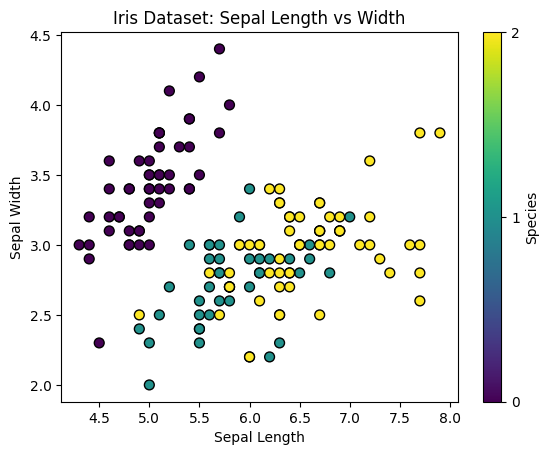

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Sepal Length vs Width')
plt.colorbar(ticks=[0, 1, 2], label='Species')
plt.show()

## Exercises

### Pandas

We've covered a a lot of information, but let's practice _how_ to find more information on pandas:
Look for more functions that could be useful in the pandas documentation at this link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

##### Exercise 1:
Find a few functions that could be uesful and tell us what they do.

#### And now, practice using the pandas library with these next exercises:

##### Exercise 2: 
Create a DataFrame of your own with made-up data on a topic of interest (e.g., favorite movies, sports stats).
##### Exercise 3: 
Filter rows based on a specific condition (like a rating of 4 stars or higher).
##### Exercise 4: 
Add a new column based on existing data (e.g., a “Recommended” column for movies rated 4 stars or more).

##### Exercise 5:
Try plotting data from your DataFrame (e.g., using matplotlib from last week!).

##### (Longer) Exercise 6:
Find a cool dataset from kaggle (or anywhere else), perform some basic data analysis with pandas, and present your findings!

### Sklearn

Look for different types of models that sklearn has built-in at this link: https://scikit-learn.org/stable/supervised_learning.html
(We'll be getting into some of these in the coming weeks!)

##### Exercise 7:
Input your own hypothetical flower data into model2 and see what it predicts! 
For example, execute these commands: 
`new_flower = [[val_1, val_2, val_3, val_4]]`
`prediction_for_new_flower = model2.predict(new_flower)`
`print("The model predicts that new_flower is of species: ", prediction_for_new_flower[0])`

##### (Longer) Exercise 8: 
Predict Housing Prices using the boston housing dataset.
Load the dataset with the following code: `from sklearn.datasets import load_boston`
Here is a layout of the steps you should follow:

1. Load the dataset
2. Split it into training and test sets (experiment with different split sizes)
3. Use a **linear regression** model to predict the target value (home prices). (`from sklearn.linear_model import LinearRegression`)
4. Calculate the model’s error using mean_squared_error. (`from sklearn.metrics import mean_squared_error`)
5. Print a few predictions and compare them to actual values.
6. Challenge: experiment with more features or remove features to see if the model performs better or worse
You can remove features using the drop() function: `X_reduced = X.drop(columns=['col_1', 'col_2', ..., 'col_n'])` - you can have as many or as little as you want!
And when splitting the data, make sure the first parameter to `train_test_split` is `X_reduced`!

### You've reached the end! Great job today guys!
#### And be prepared to present excercies 1, 6, and 8 (if time permits!)

## Feedback:
Please fill out this form - it would be absolutely amazing! 
https://forms.gle/nGfvLHbP76jQNyyA9

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f0e7f69-7ba4-4686-9dab-bae9ca042fc0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>